# Reuters C50 Problem

## Write-up

### Question: How does complexity vary by authors and categories?

I wanted further analyze our text data to understand how complexity of a writing style varies by author. I also investigated if this writing style was influenced at all by the category of text. 

### Approach: Analyzing writing styles through complexity measures and clustering

I processed the data to group each text file by author and gathered various complexity metrics (Flesch Kincaid Grade, TTR, Average Sentence length, Dale-Chall, Lexical Diversity, etc) for each text file. I then averaged these scores across all text files, for each author, to get an average complexity score. Lastly, I did K-means clustering to further analyze complexity metrics. 

For my categories, I iterated through each text file, added the key words per category, and then saved the top 5 categories with the most key words (there are better ways to do this, but this was more simple and computational efficient method). I then took the average complexity scores per category and then did K-means clustering. 

In [70]:
import os
import nltk
from textstat import textstat
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

In [71]:
# Set the data directory and download the Reuters corpus if necessary
data_dir = "/Users/alexparson/Documents/GitHub/STA380/data/ReutersC50/C50train"
from nltk.corpus import reuters

# Initialize dictionaries to store texts by author and their corresponding file IDs
author_texts = {}
author_file_ids = {}
author_complexity = {}

# Traverse the directory to load the text files
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".txt"):
            # Extract author name from the directory structure
            author_name = os.path.basename(root)
            # Extract the document ID (assuming the file name without extension is the ID)
            document_id = file.replace(".txt", "")
            
            # Read the text file
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
            
            # Add the text and document ID to the author's collection
            if author_name in author_texts:
                author_texts[author_name].append(text)
                author_file_ids[author_name].append(document_id)
            else:
                author_texts[author_name] = [text]
                author_file_ids[author_name] = [document_id]

In [79]:
# Initialize Sentiment Analyzer
# sia = SentimentIntensityAnalyzer()

# DataFrame to store all author metrics
author_metrics = pd.DataFrame(columns=[
    "Author", "Flesch_Reading_Ease", "Flesch_Kincaid_Grade", 
    "Gunning_Fog", "TTR", "Avg_Sentence_Length", 
    "Syllables_per_Word", "Coleman_Liau_Index", 
    "ARI", "Dale_Chall", "Lexical_Density"])

# Now process each author's texts and categories
for author, texts in author_texts.items():
    # Combine all texts for the author
    combined_text = " ".join(texts)
    
    # Calculate readability scores
    flesch_reading_ease = textstat.flesch_reading_ease(combined_text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(combined_text)
    gunning_fog = textstat.gunning_fog(combined_text)
    # Coleman-Liau Index: Measures readability by analyzing character count.
    coleman_liau_index = textstat.coleman_liau_index(combined_text)
    # Automated Readability Index (ARI): Another readability test that considers characters and sentence length.
    ari = textstat.automated_readability_index(combined_text)
    # Dale-Chall Readability Score: Takes into account the number of difficult words.
    dale_chall = textstat.dale_chall_readability_score(combined_text)
    
    # Lexical diversity and density
    words = nltk.word_tokenize(combined_text)
    ttr = len(set(words)) / len(words)
    lexical_density = len([word for word in words if nltk.pos_tag([word])[0][1] in ['NN', 'VB', 'JJ', 'RB']]) / len(words)
    
    # Sentence complexity
    sentences = nltk.sent_tokenize(combined_text)
    avg_sentence_length = sum(len(nltk.word_tokenize(sent)) for sent in sentences) / len(sentences)
    syllables_per_word = sum(textstat.syllable_count(word) for word in words) / len(words)
    
    # Sentiment analysis
    # sentiment = sia.polarity_scores(combined_text)
    
    # Store the metrics for clustering later
    author_metrics = author_metrics.append({
        "Author": author,
        "Flesch_Reading_Ease": flesch_reading_ease,
        "Flesch_Kincaid_Grade": flesch_kincaid_grade,
        "Gunning_Fog": gunning_fog,
        "TTR": ttr,
        "Avg_Sentence_Length": avg_sentence_length,
        "Syllables_per_Word": syllables_per_word,
        "Coleman_Liau_Index": coleman_liau_index,
        "ARI": ari,
        "Dale_Chall": dale_chall,
        "Lexical_Density": lexical_density,
       # "Sentiment_Compound": sentiment["compound"]
    }, ignore_index=True)

/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autho

/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  author_metrics = author_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3607697640.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  autho

### Author Results: Large readibility range for authors

When analyzing author complexity, we see a large range of writing complexity levels. Our least-complex author writes at a 6th grade level while our most complex author writes at a 12th grade level. We also see that our clusters differ on some complexity metrics, in interesting ways. There can be a 2-grade level gap between clusters, and yet the lower-cluster may have a slightly higher Dale-Chall score (a measure of the quantity of difficult words in a text). This highlights the unique nature of writing styles, that more complex writing doesn't always involve more difficult words, or longer sentences. 

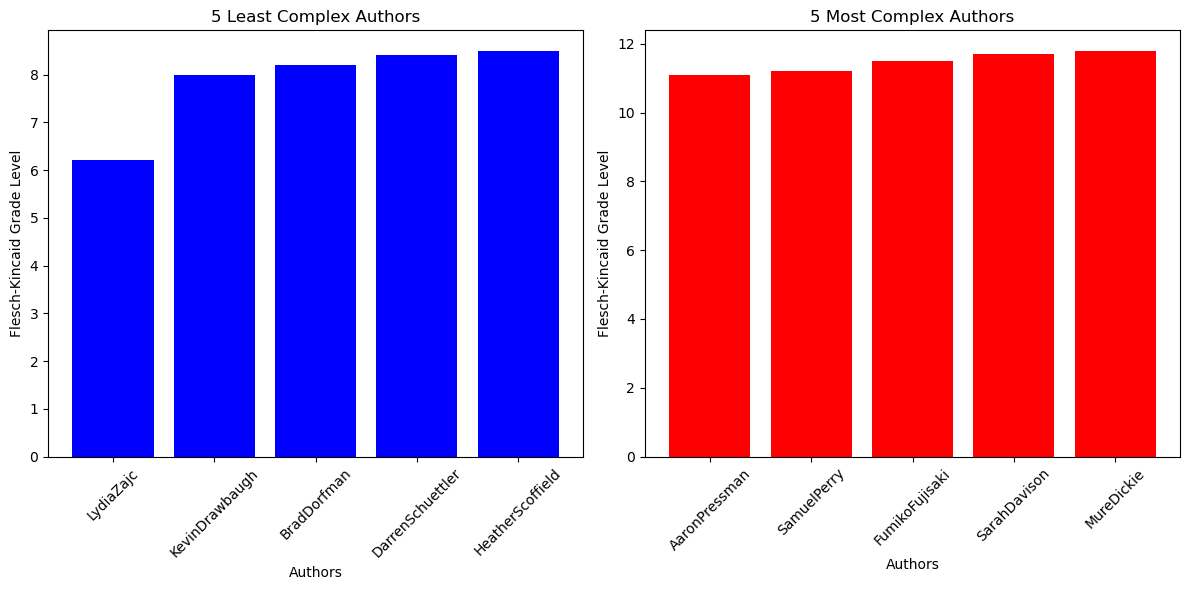

In [80]:
# Grabbing most complex and least complex authors

# Sort authors by Flesch-Kincaid Grade Level
sorted_authors = author_metrics.sort_values(by="Flesch_Kincaid_Grade")

# Get the 5 least complex authors
least_complex_authors = sorted_authors.head(5)
# Get the 5 most complex authors
most_complex_authors = sorted_authors.tail(5)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for least complex authors
plt.subplot(1, 2, 1)
plt.bar(least_complex_authors["Author"], least_complex_authors["Flesch_Kincaid_Grade"], color='blue')
plt.title('5 Least Complex Authors')
plt.xlabel('Authors')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.xticks(rotation=45)

# Plot for most complex authors
plt.subplot(1, 2, 2)
plt.bar(most_complex_authors["Author"], most_complex_authors["Flesch_Kincaid_Grade"], color='red')
plt.title('5 Most Complex Authors')
plt.xlabel('Authors')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [92]:
# Clustering based on complexity metrics
features = author_metrics.drop(columns=["Author"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
author_metrics['Cluster'] = kmeans.fit_predict(scaled_features)

# Compare clusters
author_metrics.groupby('Cluster').mean()

/Users/alexparson/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/1347153931.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  author_metrics.groupby('Cluster').mean()


,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,TTR,Avg_Sentence_Length,Syllables_per_Word,Coleman_Liau_Index,ARI,Dale_Chall,Lexical_Density
Cluster,,,,,,,,,,
0,58.757500,9.737500,8.676250,0.118967,26.606526,1.340006,11.416875,12.181250,6.041875,0.330750
1,58.208000,10.460000,10.013333,0.141741,28.647486,1.345559,11.455333,13.340000,6.476000,0.336850
2,63.689091,8.536364,7.867273,0.129506,25.469927,1.293773,10.768182,10.963636,6.050000,0.323169
3,50.882500,11.200000,9.582500,0.135379,28.523632,1.386790,12.218750,13.512500,6.351250,0.331748


In [99]:
author_metrics[author_metrics['Cluster']==3]

,Author,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,TTR,Avg_Sentence_Length,Syllables_per_Word,Coleman_Liau_Index,ARI,Dale_Chall,Lexical_Density,Cluster
3,MichaelConnor,52.49,10.6,8.90,0.145528,26.131743,1.374062,12.18,12.7,6.36,0.321782,3
5,EricAuchard,52.49,10.6,8.82,0.133734,27.665461,1.385973,12.47,13.0,6.24,0.333388,3
6,AaronPressman,51.18,11.1,9.74,0.137754,25.580198,1.438961,13.17,14.2,6.42,0.338520,3
11,SamuelPerry,50.77,11.2,9.62,0.138475,30.876833,1.400228,12.18,13.5,6.38,0.330104,3
17,MartinWolk,51.07,11.1,9.36,0.122927,30.029532,1.371189,11.72,13.0,6.16,0.321442,3
20,FumikoFujisaki,50.06,11.5,9.60,0.111157,30.187440,1.364262,12.01,13.7,6.07,0.330143,3
28,MureDickie,49.45,11.8,10.32,0.146830,29.722051,1.382415,11.89,13.9,6.59,0.333586,3
44,SarahDavison,49.55,11.7,10.30,0.146627,27.995802,1.377231,12.13,14.1,6.59,0.345020,3


/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3366537597.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_1_averages = author_metrics[author_metrics['Cluster'] == 1].mean()
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3366537597.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_2_averages = author_metrics[author_metrics['Cluster'] == 3].mean()


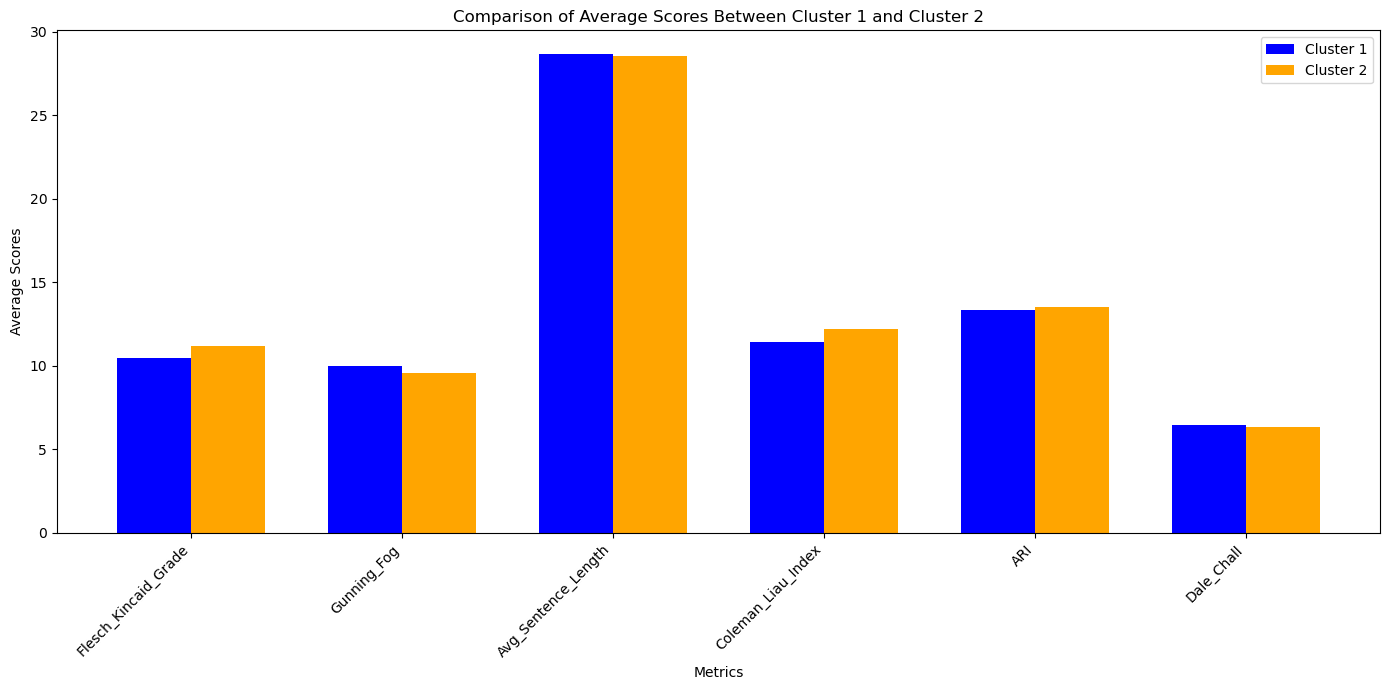

In [122]:
# Calculate the average scores for each metric within Cluster 1 and Cluster 2
cluster_1_averages = author_metrics[author_metrics['Cluster'] == 1].mean()
cluster_2_averages = author_metrics[author_metrics['Cluster'] == 3].mean()

# Metrics to compare (excluding 'Cluster' and 'Sentiment_Compound' if not needed)
metrics_to_compare = [
    "Flesch_Kincaid_Grade", 
    "Gunning_Fog", "Avg_Sentence_Length", 
    "Coleman_Liau_Index", "ARI", "Dale_Chall" 
    ]

# Extract the relevant metrics for the plot
cluster_1_scores = cluster_1_averages[metrics_to_compare]
cluster_2_scores = cluster_2_averages[metrics_to_compare]

# Plotting the comparison
x = range(len(metrics_to_compare))
width = 0.35  # Width of the bars

plt.figure(figsize=(14, 7))
plt.bar(x, cluster_1_scores, width, label='Cluster 2', color='blue')
plt.bar([i + width for i in x], cluster_2_scores, width, label='Cluster 4', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Average Scores')
plt.title('Comparison of Average Scores Between Cluster 2 and Cluster 4')
plt.xticks([i + width/2 for i in x], metrics_to_compare, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [ ]:
import os
import nltk
from textstat import textstat
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [125]:
# Set the data directory and download the Reuters corpus if necessary
data_dir = "/Users/alexparson/Documents/GitHub/STA380/data/ReutersC50/C50train"
from nltk.corpus import reuters

# Define the categories and associated keywords
categories_keywords = {
    'acq': ['acquisition', 'merger', 'buyout', 'purchase', 'deal'],
    'alum': ['aluminum', 'alumina', 'smelting', 'metal'],
    'barley': ['barley', 'grain', 'harvest', 'crop', 'farming'],
    'bop': ['balance of payments', 'bop', 'trade deficit'],
    'carcass': ['carcass', 'meat', 'slaughter', 'livestock'],
    'castor-oil': ['castor', 'castor oil', 'vegetable oil'],
    'cocoa': ['cocoa', 'chocolate', 'cocoa bean', 'harvest'],
    'coconut': ['coconut', 'copra', 'tropical fruit'],
    'coconut-oil': ['coconut oil', 'copra oil', 'vegetable oil'],
    'coffee': ['coffee', 'arabica', 'robusta', 'bean'],
    'copper': ['copper', 'metal', 'mining', 'ore'],
    'copra-cake': ['copra cake', 'coconut residue', 'animal feed'],
    'corn': ['corn', 'maize', 'grain', 'farming', 'crop'],
    'cotton': ['cotton', 'fiber', 'textile', 'harvest'],
    'cotton-oil': ['cottonseed oil', 'vegetable oil', 'cotton oil'],
    'cpi': ['consumer price index', 'cpi', 'inflation'],
    'cpu': ['central processing unit', 'cpu', 'computer'],
    'crude': ['oil', 'crude', 'barrel', 'petroleum', 'energy'],
    'dfl': ['deutschemark', 'dfl', 'german currency'],
    'dlr': ['dollar', 'usd', 'currency'],
    'dmk': ['deutschemark', 'dmk', 'german currency'],
    'earn': ['profit', 'loss', 'income', 'revenue', 'earnings'],
    'fuel': ['fuel', 'gasoline', 'diesel', 'energy'],
    'gas': ['gas', 'natural gas', 'fuel', 'energy'],
    'gnp': ['gross national product', 'gnp', 'economy'],
    'gold': ['gold', 'precious metal', 'bullion'],
    'grain': ['grain', 'wheat', 'barley', 'corn', 'crop'],
    'groundnut': ['groundnut', 'peanut', 'legume'],
    'groundnut-oil': ['groundnut oil', 'peanut oil', 'vegetable oil'],
    'heat': ['heat', 'temperature', 'weather'],
    'hog': ['hog', 'pig', 'swine', 'livestock'],
    'housing': ['housing', 'real estate', 'property'],
    'income': ['income', 'earnings', 'salary', 'wages'],
    'instal-debt': ['installment debt', 'loan', 'credit', 'finance'],
    'interest': ['interest', 'rate', 'yield', 'bond', 'loan'],
    'ipi': ['industrial production index', 'ipi', 'manufacturing'],
    'iron-steel': ['iron', 'steel', 'metal', 'mining'],
    'jet': ['jet fuel', 'aviation fuel', 'airline'],
    'jobs': ['jobs', 'employment', 'unemployment', 'work'],
    'l-cattle': ['cattle', 'livestock', 'beef'],
    'lead': ['lead', 'metal', 'mining'],
    'lei': ['leading economic indicators', 'lei', 'economy'],
    'lin-oil': ['linseed oil', 'flaxseed oil', 'vegetable oil'],
    'livestock': ['livestock', 'cattle', 'hog', 'animal'],
    'lumber': ['lumber', 'wood', 'timber', 'forestry'],
    'meal-feed': ['meal', 'feed', 'animal feed', 'grain'],
    'money-fx': ['currency', 'forex', 'exchange', 'dollar', 'euro'],
    'money-supply': ['money supply', 'm1', 'm2', 'economy'],
    'naphtha': ['naphtha', 'petrochemical', 'oil'],
    'nat-gas': ['natural gas', 'nat-gas', 'energy', 'fuel'],
    'nickel': ['nickel', 'metal', 'mining'],
    'nkr': ['norwegian krone', 'nkr', 'currency'],
    'nzdlr': ['new zealand dollar', 'nzdlr', 'currency'],
    'oat': ['oat', 'grain', 'cereal'],
    'oilseed': ['oilseed', 'soybean', 'rapeseed', 'sunseed'],
    'orange': ['orange', 'citrus', 'fruit'],
    'palladium': ['palladium', 'precious metal', 'bullion'],
    'palm-oil': ['palm oil', 'vegetable oil', 'cooking oil'],
    'palmkernel': ['palm kernel', 'palm oil', 'kernel'],
    'pet-chem': ['petrochemical', 'chemicals', 'oil'],
    'platinum': ['platinum', 'precious metal', 'bullion'],
    'potato': ['potato', 'vegetable', 'crop'],
    'propane': ['propane', 'fuel', 'gas'],
    'rand': ['south african rand', 'rand', 'currency'],
    'rape-oil': ['rapeseed oil', 'rape oil', 'vegetable oil'],
    'rapeseed': ['rapeseed', 'oilseed', 'canola'],
    'reserves': ['reserves', 'foreign exchange', 'central bank'],
    'retail': ['retail', 'shopping', 'consumer', 'store'],
    'rice': ['rice', 'grain', 'crop', 'harvest'],
    'rubber': ['rubber', 'latex', 'commodity'],
    'rye': ['rye', 'grain', 'cereal'],
    'ship': ['ship', 'vessel', 'maritime', 'freight', 'cargo'],
    'silver': ['silver', 'precious metal', 'bullion'],
    'sorghum': ['sorghum', 'grain', 'crop', 'harvest'],
    'soy-meal': ['soymeal', 'soybean meal', 'animal feed'],
    'soy-oil': ['soyoil', 'soybean oil', 'vegetable oil'],
    'soybean': ['soybean', 'legume', 'oilseed'],
    'strategic-metal': ['strategic metal', 'rare earth', 'mineral'],
    'sugar': ['sugar', 'sweetener', 'cane', 'beet'],
    'sun-meal': ['sunflower meal', 'sun meal', 'animal feed'],
    'sun-oil': ['sunflower oil', 'sun oil', 'vegetable oil'],
    'sunseed': ['sunflower seed', 'sunseed', 'oilseed'],
    'tea': ['tea', 'leaf', 'brew'],
    'tin': ['tin', 'metal', 'mining'],
    'trade': ['trade', 'export', 'import', 'tariff', 'commerce'],
    'veg-oil': ['vegetable oil', 'cooking oil', 'palm oil', 'soy oil'],
    'wheat': ['wheat', 'grain', 'harvest', 'crop'],
    'wpi': ['wholesale price index', 'wpi', 'inflation'],
    'yen': ['japanese yen', 'yen', 'currency'],
    'zinc': ['zinc', 'metal', 'mining']
}

# Initialize dictionaries to store texts by category
category_texts = {category: [] for category in categories_keywords.keys()}

# Traverse the directory to load the text files
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".txt"):
            # Extract the document ID (assuming the file name without extension is the ID)
            document_id = file.replace(".txt", "")
            
            # Read the text file
            with open(os.path.join(root, file), 'r') as f:
                text = f.read()
            
            # Assign the text to the appropriate category based on keywords
            for category, keywords in categories_keywords.items():
                if any(keyword in text.lower() for keyword in keywords):
                    category_texts[category].append(text)
                    break  # Stop after the first match to avoid multiple categorization


In [126]:
# DataFrame to store all category metrics
category_metrics = pd.DataFrame(columns=[
    "Category", "Flesch_Reading_Ease", "Flesch_Kincaid_Grade", 
    "Gunning_Fog", "TTR", "Avg_Sentence_Length", 
    "Syllables_per_Word", "Coleman_Liau_Index", 
    "ARI", "Dale_Chall", "Lexical_Density"])

# Now process each category's texts
for category, texts in category_texts.items():
    if not texts:  # Skip empty categories
        continue

    # Combine all texts for the category
    combined_text = " ".join(texts)
    
    # Calculate readability scores
    flesch_reading_ease = textstat.flesch_reading_ease(combined_text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(combined_text)
    gunning_fog = textstat.gunning_fog(combined_text)
    coleman_liau_index = textstat.coleman_liau_index(combined_text)
    ari = textstat.automated_readability_index(combined_text)
    dale_chall = textstat.dale_chall_readability_score(combined_text)
    
    # Lexical diversity and density
    words = nltk.word_tokenize(combined_text)
    ttr = len(set(words)) / len(words)
    lexical_density = len([word for word in words if nltk.pos_tag([word])[0][1] in ['NN', 'VB', 'JJ', 'RB']]) / len(words)
    
    # Sentence complexity
    sentences = nltk.sent_tokenize(combined_text)
    avg_sentence_length = sum(len(nltk.word_tokenize(sent)) for sent in sentences) / len(sentences)
    syllables_per_word = sum(textstat.syllable_count(word) for word in words) / len(words)
    
    # Store the metrics for later analysis
    category_metrics = category_metrics.append({
        "Category": category,
        "Flesch_Reading_Ease": flesch_reading_ease,
        "Flesch_Kincaid_Grade": flesch_kincaid_grade,
        "Gunning_Fog": gunning_fog,
        "TTR": ttr,
        "Avg_Sentence_Length": avg_sentence_length,
        "Syllables_per_Word": syllables_per_word,
        "Coleman_Liau_Index": coleman_liau_index,
        "ARI": ari,
        "Dale_Chall": dale_chall,
        "Lexical_Density": lexical_density,
    }, ignore_index=True)
    

/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/4174131904.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_metrics = category_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/4174131904.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_metrics = category_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/4174131904.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  category_metrics = category_metrics.append({
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/4174131904.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

### Category Complexity Results

Our category method provides less-conclusive results, as we see our categories with the highest complexity scores are 'meal-feed', 'tin', and 'install debt'. Our clustering analysis shows that we have a variety of categories in our clusters, as we see a cluster with a good mix of finance and agriculture categories. This could mean that these fields are highly complex, or authors that tend to write about these fields favor complex writing styles. 

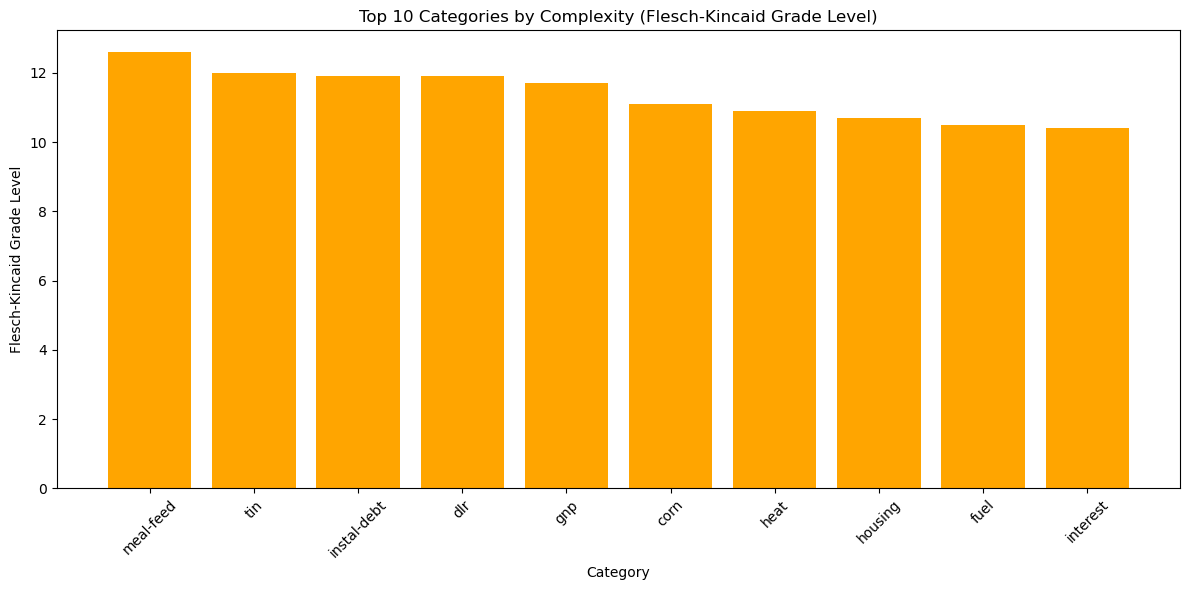

In [127]:
# Sort categories by Flesch-Kincaid Grade Level (or any other complexity metric you prefer)
sorted_categories = category_metrics.sort_values(by="Flesch_Kincaid_Grade", ascending=False)

# Get the top 10 categories by complexity (highest Flesch-Kincaid Grade Level)
top_10_categories = sorted_categories.head(10)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(top_10_categories["Category"], top_10_categories["Flesch_Kincaid_Grade"], color='orange')
plt.title('Top 10 Categories by Complexity (Flesch-Kincaid Grade Level)')
plt.xlabel('Category')
plt.ylabel('Flesch-Kincaid Grade Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/Users/alexparson/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/2408475341.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_1_averages = category_metrics[category_metrics['Cluster'] == 0].mean()
/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/2408475341.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify th

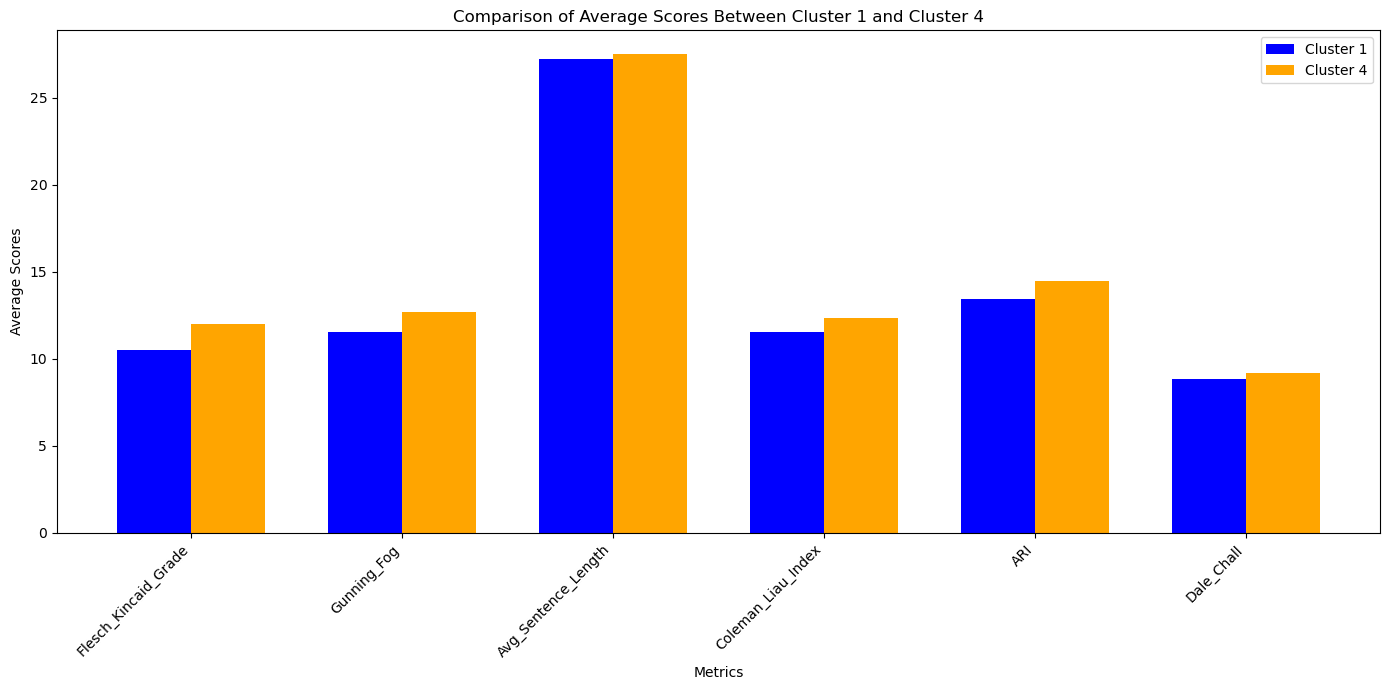

In [132]:
# Clustering based on complexity metrics
features = category_metrics.drop(columns=["Category"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
category_metrics['Cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the results
plt.figure(figsize=(14, 7))

# Plot comparison of Cluster 1 and Cluster 2 (for example)
cluster_1_averages = category_metrics[category_metrics['Cluster'] == 0].mean()
cluster_2_averages = category_metrics[category_metrics['Cluster'] == 3].mean()

metrics_to_compare = [
    "Flesch_Kincaid_Grade", 
    "Gunning_Fog", "Avg_Sentence_Length", 
    "Coleman_Liau_Index", "ARI", "Dale_Chall"  
]

x = range(len(metrics_to_compare))
width = 0.35  # Width of the bars

plt.bar(x, cluster_1_averages[metrics_to_compare], width, label='Cluster 1', color='blue')
plt.bar([i + width for i in x], cluster_2_averages[metrics_to_compare], width, label='Cluster 4', color='orange')

plt.xlabel('Metrics')
plt.ylabel('Average Scores')
plt.title('Comparison of Average Scores Between Cluster 1 and Cluster 4')
plt.xticks([i + width/2 for i in x], metrics_to_compare, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

In [131]:
category_metrics.groupby('Cluster').mean()

/var/folders/xq/zt1b259x609_m4jtvlr5gfsw0000gn/T/ipykernel_71609/3410861000.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category_metrics.groupby('Cluster').mean()


,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,TTR,Avg_Sentence_Length,Syllables_per_Word,Coleman_Liau_Index,ARI,Dale_Chall,Lexical_Density
Cluster,,,,,,,,,,
0,58.143000,10.510000,11.544,0.394002,27.252856,1.344595,11.548000,13.430000,8.84,0.338996
1,89.240000,2.700000,5.070,0.860140,35.750000,1.265734,6.970000,5.700000,15.24,0.230769
2,61.794545,9.072727,8.710,0.195154,25.937212,1.321910,11.149091,11.627273,6.11,0.330401
3,48.767500,12.025000,12.705,0.425332,27.508110,1.397778,12.332500,14.450000,9.21,0.329875


In [120]:
category_metrics[category_metrics['Cluster']==0]

,Category,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,TTR,Avg_Sentence_Length,Syllables_per_Word,Coleman_Liau_Index,ARI,Dale_Chall,Lexical_Density,Cluster
11,dlr,49.15,11.9,11.93,0.318642,28.539062,1.416918,12.59,14.6,8.53,0.320285,3
14,gnp,49.55,11.7,12.42,0.399621,28.285714,1.378788,12.13,14.1,9.14,0.347222,3
18,instal-debt,49.15,11.9,13.05,0.441889,26.645161,1.378935,11.78,13.8,9.61,0.341404,3
23,meal-feed,47.22,12.6,13.42,0.541176,26.562500,1.416471,12.83,15.3,9.56,0.310588,3


In [121]:
category_metrics[category_metrics['Cluster']==2]

,Category,Flesch_Reading_Ease,Flesch_Kincaid_Grade,Gunning_Fog,TTR,Avg_Sentence_Length,Syllables_per_Word,Coleman_Liau_Index,ARI,Dale_Chall,Lexical_Density,Cluster
0,acq,60.95,9.4,7.87,0.040353,27.176390,1.335715,11.49,12.2,1.45,0.331204,2
1,alum,62.17,8.9,8.22,0.141985,26.348355,1.299824,11.02,11.5,6.28,0.325180,2
2,barley,60.65,9.5,8.79,0.124467,26.276916,1.327409,11.37,12.2,6.16,0.327594,2
3,bop,62.88,8.7,8.35,0.185457,29.257971,1.299188,11.02,11.2,6.54,0.348326,2
4,carcass,61.87,9.1,8.79,0.185116,27.498708,1.323811,10.79,11.3,6.66,0.327288,2
5,cocoa,59.64,9.9,10.27,0.264948,23.882096,1.312854,11.78,13.0,7.60,0.339916,2
7,copper,59.84,9.8,8.37,0.043983,27.298793,1.346261,11.55,12.7,1.56,0.331542,2
9,cpu,54.73,9.7,8.63,0.207465,25.977901,1.350489,11.66,11.6,6.99,0.319864,2
10,crude,65.22,7.8,8.00,0.292202,21.813084,1.331620,10.90,10.1,7.80,0.320908,2
12,earn,61.36,9.2,9.23,0.201485,26.707692,1.316628,11.26,11.8,7.06,0.327189,2


### Conclusion: Segment Reuter's readers and assess individual author's complexity scores

If Reuter's is trying to expand their customer base, they can segment readers by category and complexity level. They then can assess if a large gap exists between the complexity score of current articles and the complexity score desired by readers. Reuters can train authors to write less-complex articles and capture a larger customer pool. 